The first chunk of code that you'll be reviewing is function to prepare smartphone data from a CSV file for visualization. After ingesting and cleaning the smartphone data, there is a function to plot a variable passed to the function, versus `"price"`. However, within this function, there is code that does not adhere to DRY principles and is copied and pasted. Make sure to refactor the code appropriately, using the `column_to_label()` function defined below.

There is even a unit test included to ensure `NaN` values were removed from the cleaned DataFrame! However, it doesn't seem like the unit test is passing when executed. Re-work this unit test to ensure that it matches the transformation logic in the `prepare_smartphone_data()` function.

Once you've made changes to the `test_nan_values` unit test, you'll want to ensure that these unit tests execute with `ExitCode.OK`. This means that the `pytest` defined above has passed testing, and the code is one step closer to being to be shipped to production.

For context, there is a print statement in the `prepare_smartphone_data()` function in the first cell of the notebook below that can be used to visualize the dataset. Feel free to update this line of code as needed. Best of luck!

In [13]:
import os
import pandas as pd


def prepare_smartphone_data(file_path):
    """
    To prepare the smartphone data for visualization, a number of transformations 
    will be applied after reading in the raw DataFrame to memory, including:
        - reducing the number of columns to only those needed for later analysis
        - removing records without a battery_capacity value
        - divide the price column by 100 to find the dollar amount
    
    :param file_path: the file path where the raw smartphone data is stored
    :return: a cleaned dataset having had the operations above applied to it
    """
    
    if os.path.exists(file_path):
        rawData = pd.read_csv(file_path)
        print(rawData.head())  # TODO: Use this for checking out the dataset, remove before submission
    else:
        raise Exception(f"File containing smartphone data not found at path {file_path}")

    columns_to_keep_in_clean_data = [
        "brand_name",
        "os",
        "price",
        "avg_rating",
        "processor_speed",
        "battery_capacity",
        "screen_size"
    ]
    trimmedData=rawData.loc[
    :, columns_to_keep_in_clean_data]
    
    # Remove records without a battery_capacity value
    reducedData=trimmedData.dropna(subset = ["battery_capacity", "os"])
    
    
    
    # Divide the price column by 100 to find the dollar amount
    reducedData["price"]=reducedData["price"]/ 100
    
    return reducedData


# Call the function
cleaned_data = prepare_smartphone_data("./data/smartphones.csv")


  brand_name                    model  ...  resolution_height  resolution_width
0      apple          Apple iPhone 11  ...               1792               828
1      apple  Apple iPhone 11 (128GB)  ...               1792               828
2      apple  Apple iPhone 11 Pro Max  ...               2688              1242
3      apple          Apple iPhone 12  ...               2532              1170
4      apple  Apple iPhone 12 (128GB)  ...               2532              1170

[5 rows x 22 columns]


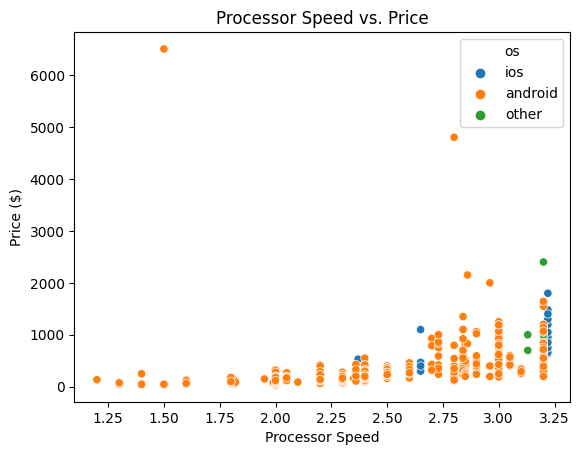

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


def column_to_label(column_name):
    """
    Converts a column name in a pandas DataFrame to a string that can be
    used as a label in a plot.
    
    :param column_name: string containing original column name
    :return: string that is ready to be presented on a plot
    """
    
    # Validate that column_name is a string
    if isinstance(column_name, str):
        return " ".join(column_name.split("_")).title()
    
    # If the value provided is not a string, raise an Exception
    else:
        raise Exception("Please makes sure to pass a value of type 'str'.")


def visualize_versus_price(clean_data, x):
    """
    Use seaborn and matplotlib to identify a pattern between avg_rating and 
    battery_capacity.
    
    :param clean_data: a pandas DataFrame containing cleaned smartphone data
    :param x: variable to be plotted on the x-axis
    :return: None
    """
    
    # Create the scatterplot
    sns.scatterplot(x=x, y="price", data=clean_data, hue="os")
    
    # Add x and y labels
    plt.xlabel(" ".join(x.split("_")).title())
    plt.ylabel("Price ($)")
    
    # Add a title to the plot
    plt.title(f"{' '.join(x.split('_')).title()} vs. Price")
    
    
# Call the visualize_versus_price function
visualize_versus_price(cleaned_data, "processor_speed")


In [9]:
!pip3 install pytest ipytest

import pytest
import ipytest

ipytest.config.rewrite_asserts = True
__file__ = "notebook.ipynb"


# Create a clean DataFrame fixture
@pytest.fixture()
def clean_smartphone_data():
    return prepare_smartphone_data("./data/smartphones.csv")

    
def test_nan_values(clean_smartphone_data):
    """
    Test for no NaN value for "battery_capacity" or "os"
    """
    
    # Assert there are no NaN value in "battery_capacity" or "os"
    assert clean_smartphone_data["battery_capacity"].isnull().sum() == 0
    assert not clean_smartphone_data["os"].isnull().sum() == 0

    
ipytest.run("-qq")


F                                                                                            [100%]
============================================= FAILURES =============================================
_________________________________________ test_nan_values __________________________________________

clean_smartphone_data =     brand_name       os    price  avg_rating  processor_speed  battery_capacity  screen_size
0        apple      ios  ...90
979        zte  android   619.90         8.9             3.00            5000.0         6.80

[955 rows x 7 columns]

    def test_nan_values(clean_smartphone_data):
        """
        Test for no NaN value for "battery_capacity" or "os"
        """
    
        # Assert there are no NaN value in "battery_capacity" or "os"
        assert clean_smartphone_data["battery_capacity"].isnull().sum() == 0
>       assert not clean_smartphone_data["os"].isnull().sum() == 0
E       AssertionError

/tmp/ipykernel_212/3067794090.py:21: AssertionError
===

<ExitCode.TESTS_FAILED: 1>